   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

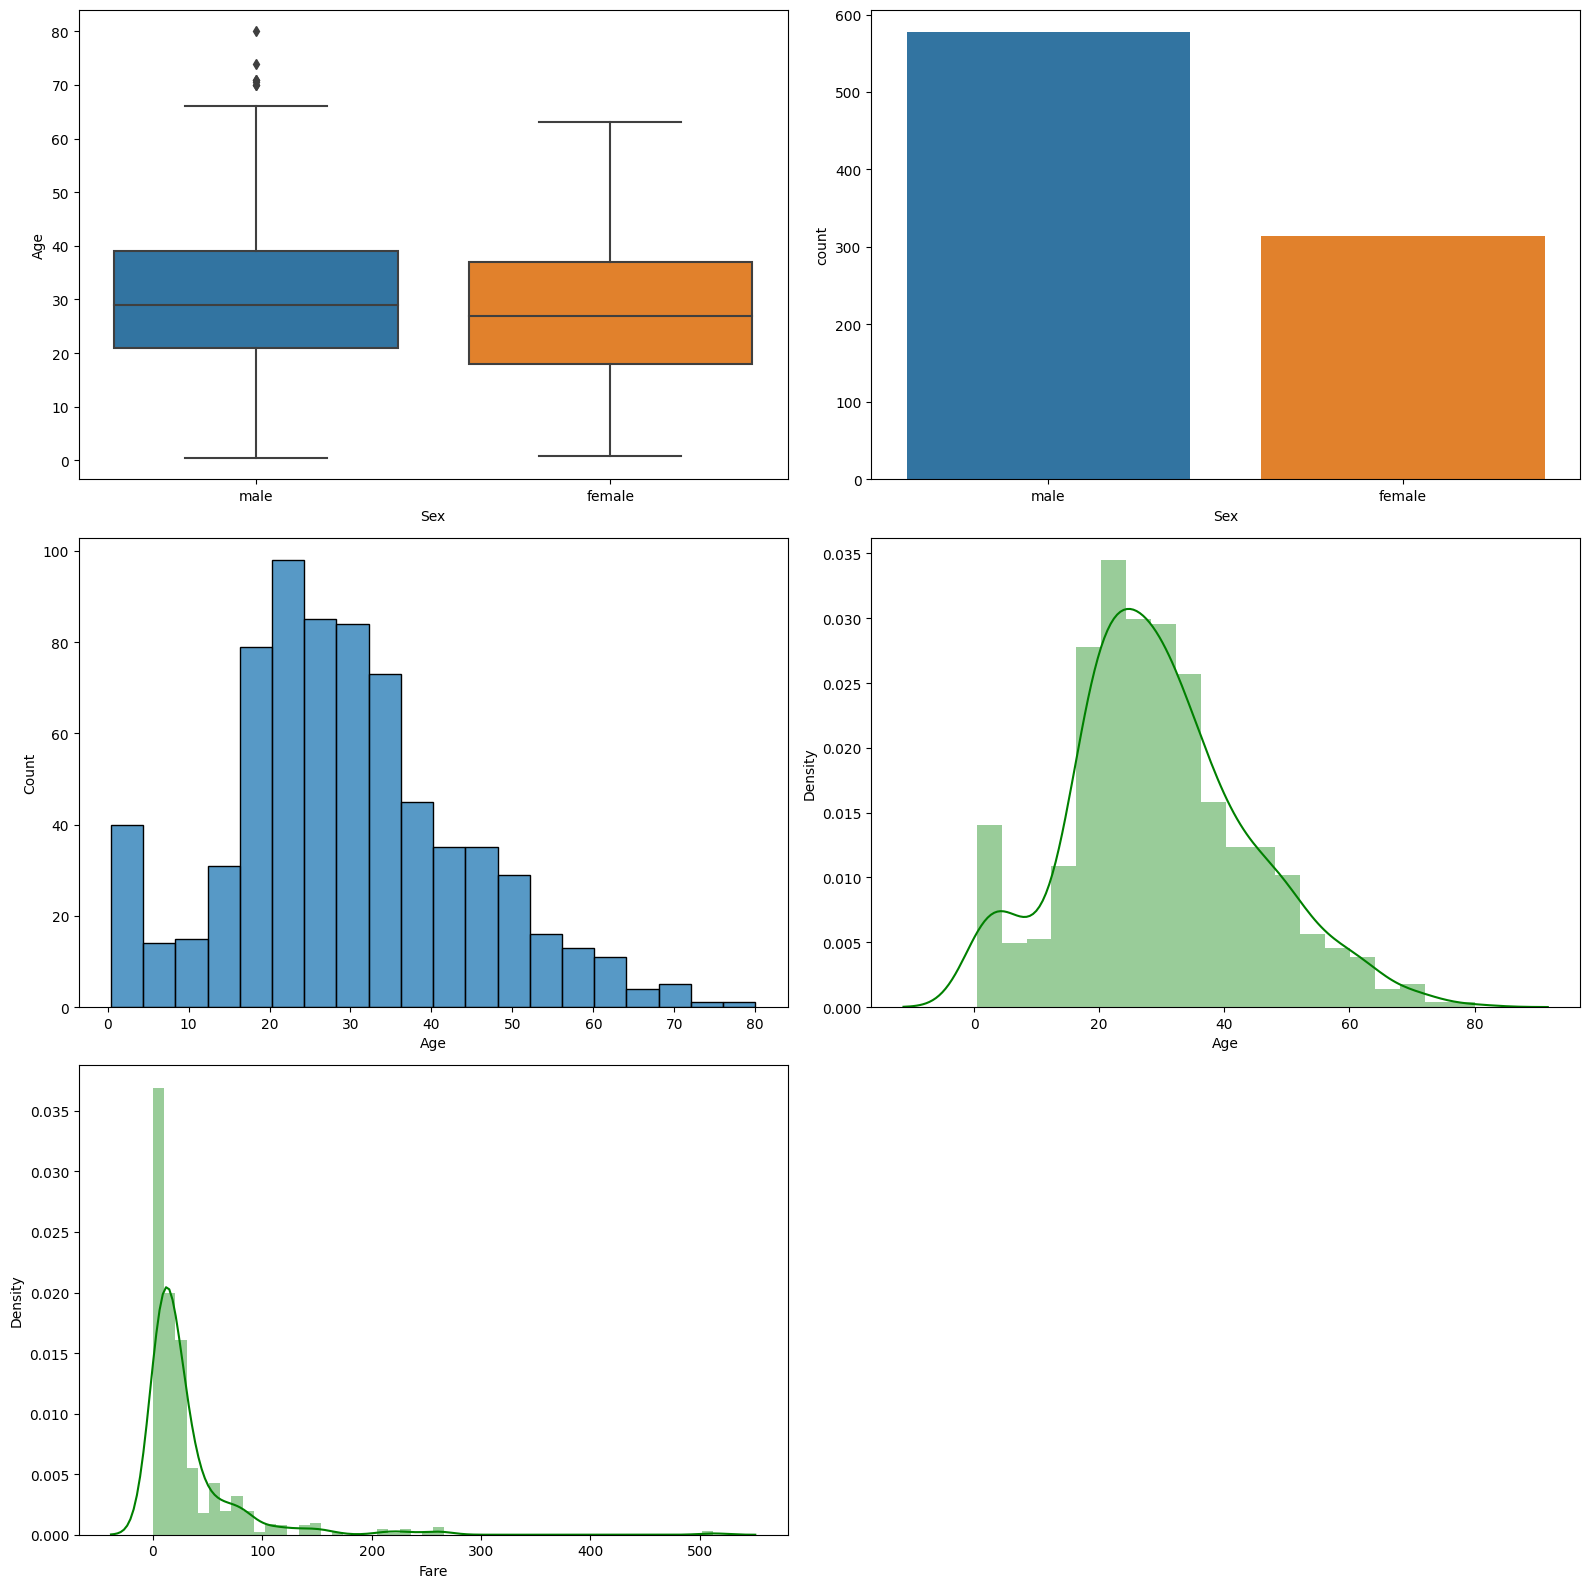

Sex
male      577
female    314
Name: count, dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         1
1         1       1    1  38.0      1      0  71.2833         2
2         1       3    1  26.0      0      0   7.9250         1
3         1       1    1  35.0      1     

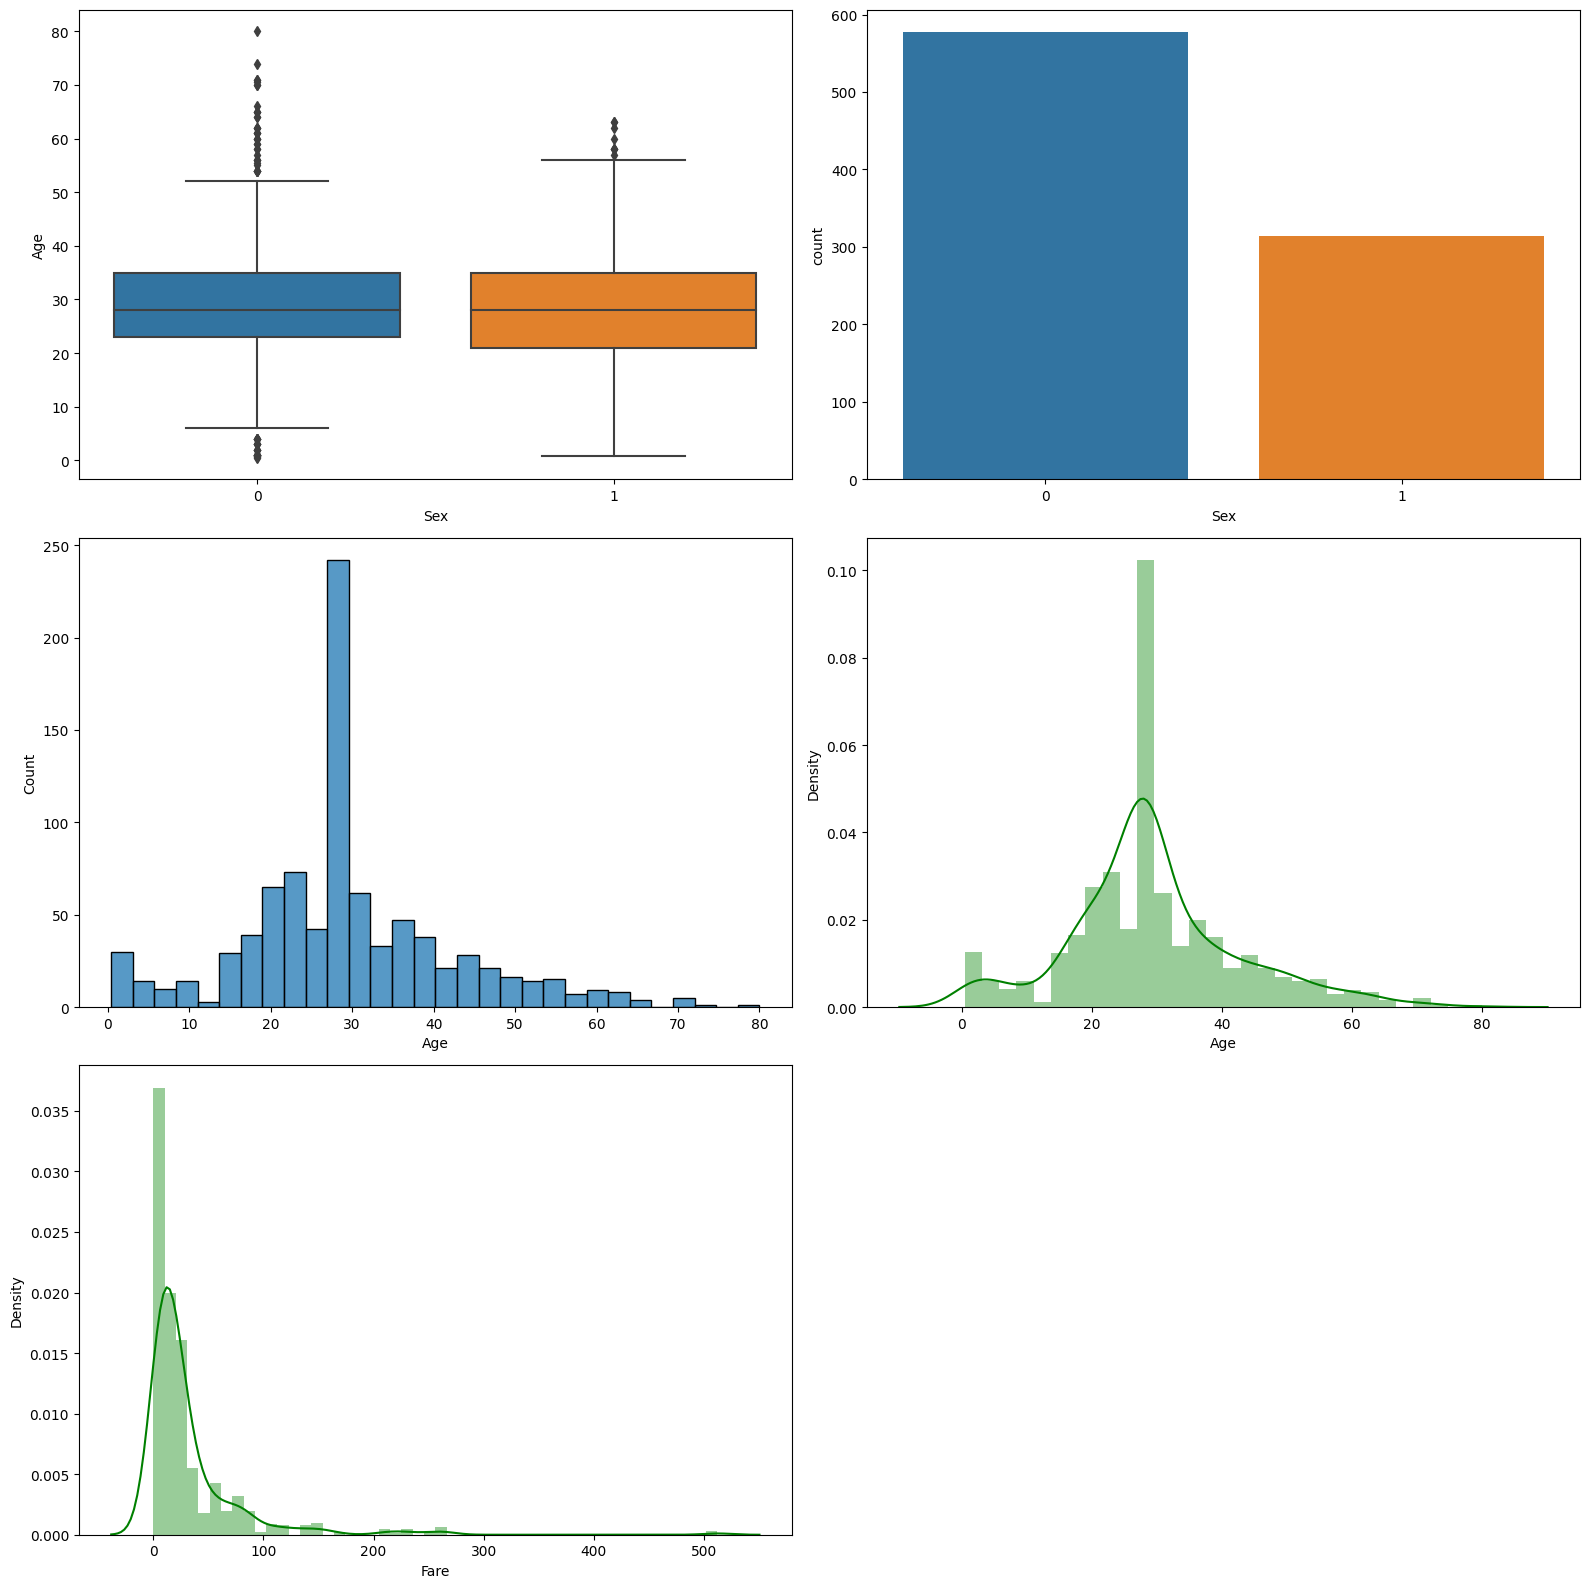

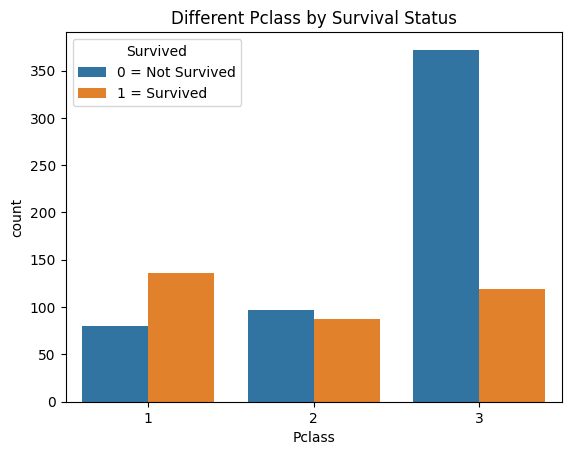

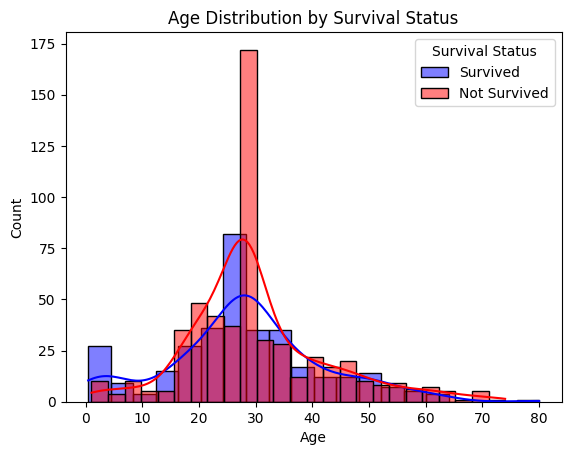

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Read the Titanic dataset
titanic_data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Display basic information about the dataset
print(titanic_data.head())
print(titanic_data.columns)
print(titanic_data.shape)
print(titanic_data.info())
print(titanic_data.isnull().sum())

# Drop unnecessary columns
titanic_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)
print(titanic_data.head())

# Set up plotting configurations
%matplotlib inline
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 16))

# Visualize data using subplots
plt.subplot(3, 2, 1)
sns.boxplot(x='Sex', y='Age', data=titanic_data)
plt.subplot(3, 2, 2)
sns.countplot(x='Sex', data=titanic_data)
plt.subplot(3, 2, 3)
sns.histplot(titanic_data['Age'])
plt.subplot(3, 2, 4)
sns.distplot(titanic_data['Age'], color='g')
plt.subplot(3, 2, 5)
sns.distplot(titanic_data['Fare'], color='g')
plt.tight_layout()
plt.show()

# Analyze and preprocess data further
print(titanic_data['Sex'].value_counts())
titanic_data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
print(titanic_data.head())
print(titanic_data.isnull().sum())

# Handle missing values
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)
print(titanic_data.isnull().sum())

# Map categorical values to numerical for 'Embarked'
titanic_data['Embarked'] = titanic_data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
print(titanic_data.head())
print(titanic_data.info())
print(titanic_data.describe())

# Visualize data after preprocessing
plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
sns.boxplot(x='Sex', y='Age', data=titanic_data)
plt.subplot(3, 2, 2)
sns.countplot(x='Sex', data=titanic_data)
plt.subplot(3, 2, 3)
sns.histplot(titanic_data['Age'])
plt.subplot(3, 2, 4)
sns.distplot(titanic_data['Age'], color='g')
plt.subplot(3, 2, 5)
sns.distplot(titanic_data['Fare'], color='g')
plt.tight_layout()
plt.show()

# Visualize survival based on Pclass
sns.countplot(x='Pclass', data=titanic_data, hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('Different Pclass by Survival Status')
plt.show()

# Visualize age distribution by survival status
sns.histplot(data=titanic_data[titanic_data['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')
sns.histplot(data=titanic_data[titanic_data['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival Status')
plt.legend(title='Survival Status')
plt.show()


CONCLUSION:
1. In First Class passengers, Survival rate is more.
2. In Second Class passengers, Survival rate is almost similar.
3. In Third Class passengers, Survival rate is less.
4.Survival count is more in the range of 25 to 35.
5.Not Survival count is more in the range of 15 to 35.